In [25]:
import psycopg2
from psycopg2 import connect, Error
from datetime import datetime
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 
con = psycopg2.connect(
     database = 'postgres',
     user     = 'postgres',
     password = '123',
     host = 'localhost',
     port = '5432'
 )
cur = con.cursor()

In [26]:

cur.execute("SELECT * FROM covid LIMIT 1")
print(cur.fetchall())

[(2, datetime.datetime(2020, 1, 22, 0, 0), 'Beijing', 'Mainland China', datetime.datetime(2020, 1, 22, 17, 0), 14, 0, 0)]


In [27]:
data = pd.read_sql_query('SELECT * FROM covid;', con)
data.head()

C:\Users\Maxim\AppData\Local\Temp\ipykernel_8980\1058013302.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query('SELECT * FROM covid;', con)


,id,observationDate,state,country,lastUpdate,Confirmed,Recovered,Deaths
0,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
1,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
2,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
3,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
4,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0


In [28]:
df_rus=data.loc[data['country'].isin(['Russia'])]
df_rus=df_rus[['observationDate','state', 'Confirmed','Deaths','Recovered']]

df_rus

,observationDate,state,Confirmed,Deaths,Recovered
619,2020-01-31,Unknown,2,0,0
679,2020-02-01,Unknown,2,0,0
751,2020-02-02,Unknown,2,0,0
820,2020-02-03,Unknown,2,0,0
890,2020-02-04,Unknown,2,0,0
...,...,...,...,...,...
306536,2021-05-29,Yaroslavl Oblast,40903,605,38968
306540,2021-05-29,Zabaykalsky Krai,43126,669,41650
306548,2020-02-11,Korolov,1,0,0
306549,2020-02-11,Saratov,1,0,0


In [29]:
df_rus1 = df_rus.loc[:10000, ['Confirmed', 'Recovered']]
df_rus1

,Confirmed,Recovered
619,2,0
679,2,0
751,2,0
820,2,0
890,2,0
963,2,0
1036,2,0
1111,2,0
1185,2,0
1259,2,0


In [30]:
df_rus_desc = df_rus.describe()

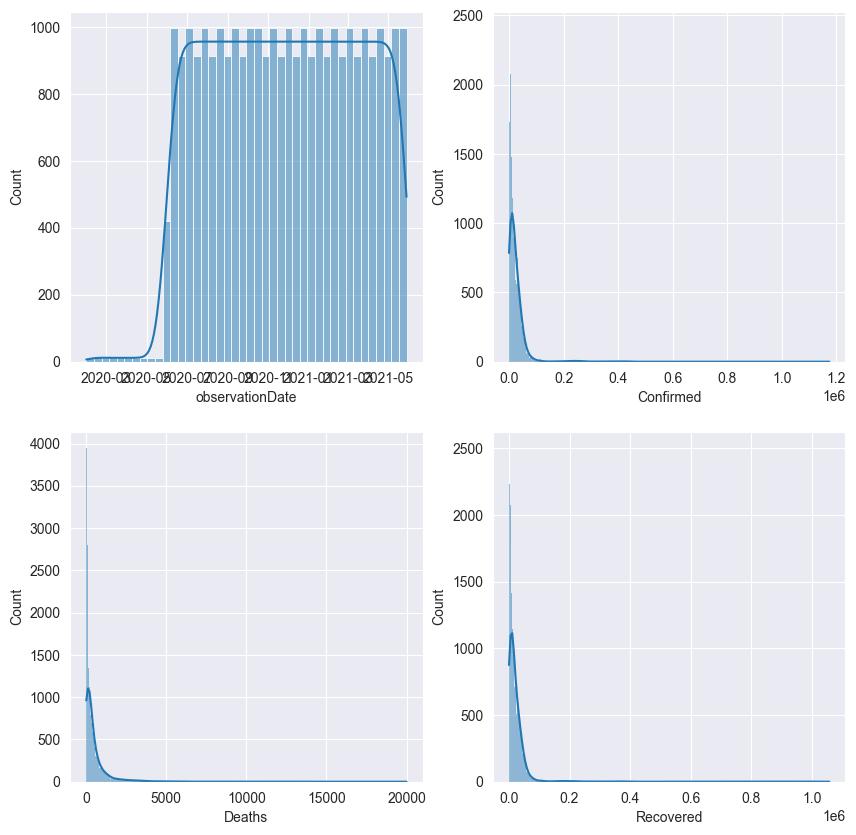

In [31]:
plt.figure(figsize=(10,10))
plt.tight_layout()
for i, col in enumerate(df_rus_desc.columns):
    bins = 'auto' if col != 'children' else df_rus[col].nunique()
    plt.subplot(2, 2, i+1)
    sns.histplot(df_rus[col], kde=True, bins=bins)
plt.show()

In [32]:
counts=df_rus.groupby ('observationDate').size()
counts = pd.DataFrame(counts, columns=['size'])
counts = counts[counts['size']>1]
counts

,size
observationDate,
2020-02-11,4
2020-06-01,83
2020-06-02,83
2020-06-03,83
2020-06-04,83
...,...
2021-05-25,83
2021-05-26,83
2021-05-27,83


In [33]:
df_rus_gr = df_rus.groupby('observationDate').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})

df_rus_gr

,Confirmed,Deaths,Recovered
observationDate,,,
2020-01-31,2,0,0
2020-02-01,2,0,0
2020-02-02,2,0,0
2020-02-03,2,0,0
2020-02-04,2,0,0
...,...,...,...
2021-05-25,4960174,117197,4579421
2021-05-26,4968421,117595,4588421
2021-05-27,4977332,117990,4598014


In [34]:
df_rus_des = df_rus_gr.describe()
df_rus_des

,Confirmed,Deaths,Recovered
count,4.850000e+02,485.000000,4.850000e+02
mean,1.918657e+06,37863.338144,1.630321e+06
std,1.737987e+06,38230.526737,1.601637e+06
min,2.000000e+00,0.000000,0.000000e+00
25%,4.058430e+05,4693.000000,1.718830e+05
50%,1.162428e+06,20456.000000,9.489850e+05
75%,3.752548e+06,70533.000000,3.194825e+06
max,4.995613e+06,118781.000000,4.616422e+06


<Axes: xlabel='observationDate'>

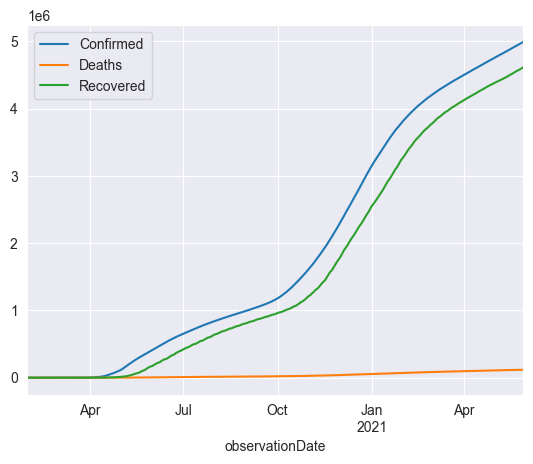

In [35]:

df_rus_gr.plot()

In [36]:
#index_names = df_rus_gr[ df_rus_gr['observationDate'] == 2020-10-31].index
#df_rus_gr.drop(index_names, inplace = True)

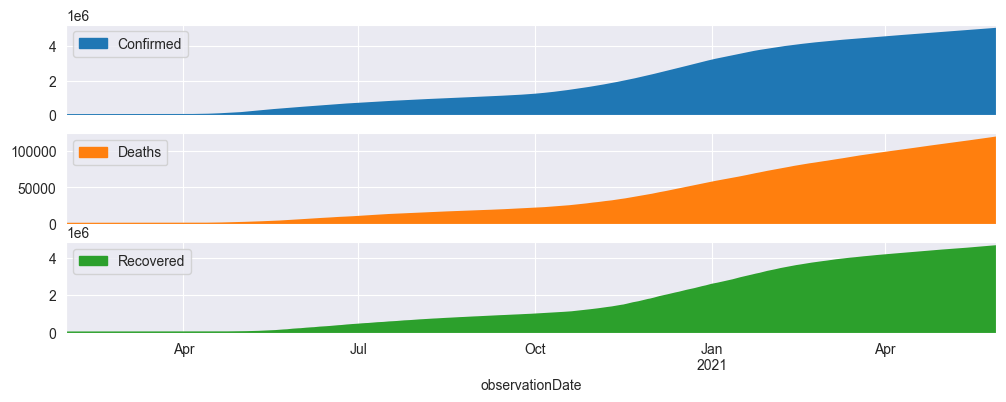

In [37]:
axs = df_rus_gr.plot.area(figsize=(12, 4), subplots=True)

In [38]:
df_rus_gr = df_rus_gr.assign(all_deaths=df_rus_gr.Deaths.cumsum())
df_rus_gr

,Confirmed,Deaths,Recovered,all_deaths
observationDate,,,,
2020-01-31,2,0,0,0
2020-02-01,2,0,0,0
2020-02-02,2,0,0,0
2020-02-03,2,0,0,0
2020-02-04,2,0,0,0
...,...,...,...,...
2021-05-25,4960174,117197,4579421,17890967
2021-05-26,4968421,117595,4588421,18008562
2021-05-27,4977332,117990,4598014,18126552


<Axes: xlabel='observationDate'>

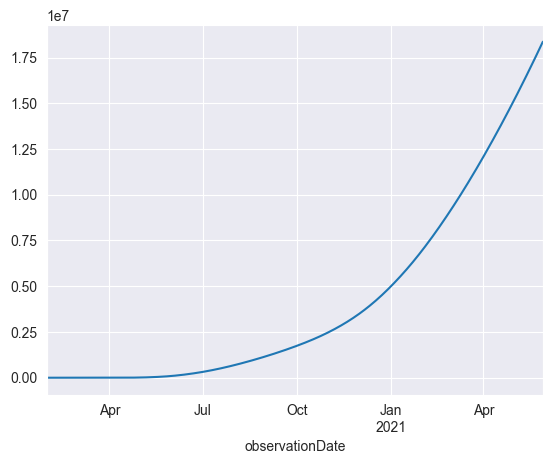

In [39]:
df_rus_gr['all_deaths'].plot()

In [40]:
df_rus_gr.describe()

,Confirmed,Deaths,Recovered,all_deaths
count,4.850000e+02,485.000000,4.850000e+02,4.850000e+02
mean,1.918657e+06,37863.338144,1.630321e+06,4.137580e+06
std,1.737987e+06,38230.526737,1.601637e+06,5.154788e+06
min,2.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,4.058430e+05,4693.000000,1.718830e+05,9.249000e+04
50%,1.162428e+06,20456.000000,9.489850e+05,1.703415e+06
75%,3.752548e+06,70533.000000,3.194825e+06,6.728861e+06
max,4.995613e+06,118781.000000,4.616422e+06,1.836372e+07


In [41]:
df_rus_gr.mean()

Confirmed     1.918657e+06
Deaths        3.786334e+04
Recovered     1.630321e+06
all_deaths    4.137580e+06
dtype: float64

In [42]:
index_names = df_rus[ df_rus['state'] == 'Unknown'].index
df_rus.drop(index_names, inplace = True)

In [43]:
df_rus

,observationDate,state,Confirmed,Deaths,Recovered
33254,2020-06-01,Adygea Republic,874,9,394
33262,2020-06-01,Altai Krai,1915,12,805
33263,2020-06-01,Altai Republic,132,0,74
33268,2020-06-01,Amur Oblast,528,5,167
33284,2020-06-01,Arkhangelsk Oblast,2068,5,606
...,...,...,...,...,...
306536,2021-05-29,Yaroslavl Oblast,40903,605,38968
306540,2021-05-29,Zabaykalsky Krai,43126,669,41650
306548,2020-02-11,Korolov,1,0,0
306549,2020-02-11,Saratov,1,0,0


In [44]:
df_rus.groupby('state').mean()

,observationDate,Confirmed,Deaths,Recovered
state,,,,
Adygea Republic,2020-11-29,8299.195592,83.460055,7262.203857
Altai Krai,2020-11-29,26786.093664,818.341598,23941.625344
Altai Republic,2020-11-29,9435.914601,83.066116,8702.647383
Amur Oblast,2020-11-29,11790.630854,116.068871,10655.840220
Arkhangelsk Oblast,2020-11-29,32844.123967,429.677686,27752.049587
...,...,...,...,...
Vologda Oblast,2020-11-29,19646.644628,382.151515,17393.446281
Voronezh Oblast,2020-11-29,39917.892562,1025.752066,36548.338843
Yamalo-Nenets Autonomous Okrug,2020-11-29,24465.807163,235.815427,21063.465565


In [45]:
data

,id,observationDate,state,country,lastUpdate,Confirmed,Recovered,Deaths
0,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
1,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
2,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
3,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
4,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0
...,...,...,...,...,...,...,...,...
306555,306557,2020-01-22,Unknown,Poland,2020-01-22 17:00:00,1,0,0
306556,306558,2021-02-11,Unknown,Litva,2021-01-22 11:00:00,1,0,0
306557,306559,2022-02-11,Unknown,Estonia,2021-01-22 11:00:00,1,0,0
306558,306560,2022-02-11,Known,Avstria,2021-01-22 11:00:00,1,0,2


In [46]:
data_gr = data.groupby('country').agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
data_gr

,Confirmed,Deaths,Recovered
country,,,
Azerbaijan,1,0,0
"('St. Martin',)",2,0,0
Afghanistan,17026442,669075,13464399
Albania,19768869,375955,13945256
Algeria,27684358,834464,18959299
...,...,...,...
West Bank and Gaza,41819444,440378,37003116
Yemen,962066,237613,506523
Zambia,13493953,205990,12625626


<Axes: xlabel='country'>

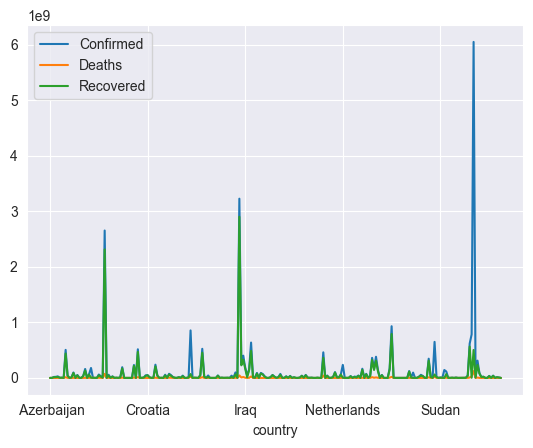

In [47]:
data_gr.plot()

In [48]:
index = data_gr[ data_gr['Confirmed'] < 9 ].index


In [49]:
data_gr.drop(index, inplace = True)

In [50]:
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,17026442,669075,13464399
Albania,19768869,375955,13945256
Algeria,27684358,834464,18959299
Andorra,2379802,32100,2162473
Angola,4764863,116489,3683041
...,...,...,...
West Bank and Gaza,41819444,440378,37003116
Yemen,962066,237613,506523
Zambia,13493953,205990,12625626


In [51]:
index1 = data_gr[ data_gr['Deaths'] < 6 ].index
data_gr.drop(index1, inplace = True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,17026442,669075,13464399
Albania,19768869,375955,13945256
Algeria,27684358,834464,18959299
Andorra,2379802,32100,2162473
Angola,4764863,116489,3683041
...,...,...,...
Vietnam,615984,10220,486370
West Bank and Gaza,41819444,440378,37003116
Yemen,962066,237613,506523


In [52]:
index2 = data_gr[ data_gr['Recovered'] < 17 ].index
data_gr.drop(index2, inplace = True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Afghanistan,17026442,669075,13464399
Albania,19768869,375955,13945256
Algeria,27684358,834464,18959299
Andorra,2379802,32100,2162473
Angola,4764863,116489,3683041
...,...,...,...
Vietnam,615984,10220,486370
West Bank and Gaza,41819444,440378,37003116
Yemen,962066,237613,506523


<Axes: xlabel='country'>

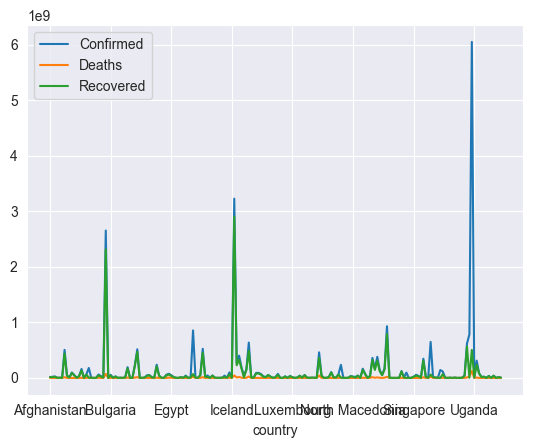

In [53]:

data_gr.plot()

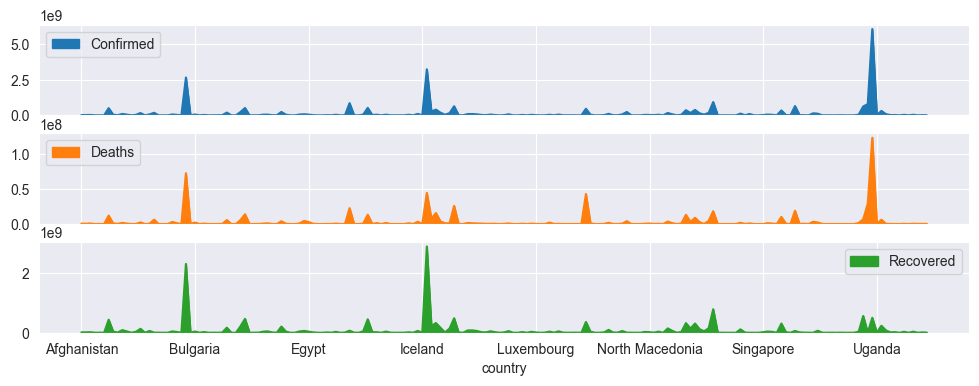

In [54]:
axs = data_gr.plot.area(figsize=(12, 4), subplots=True)

<Axes: ylabel='country'>

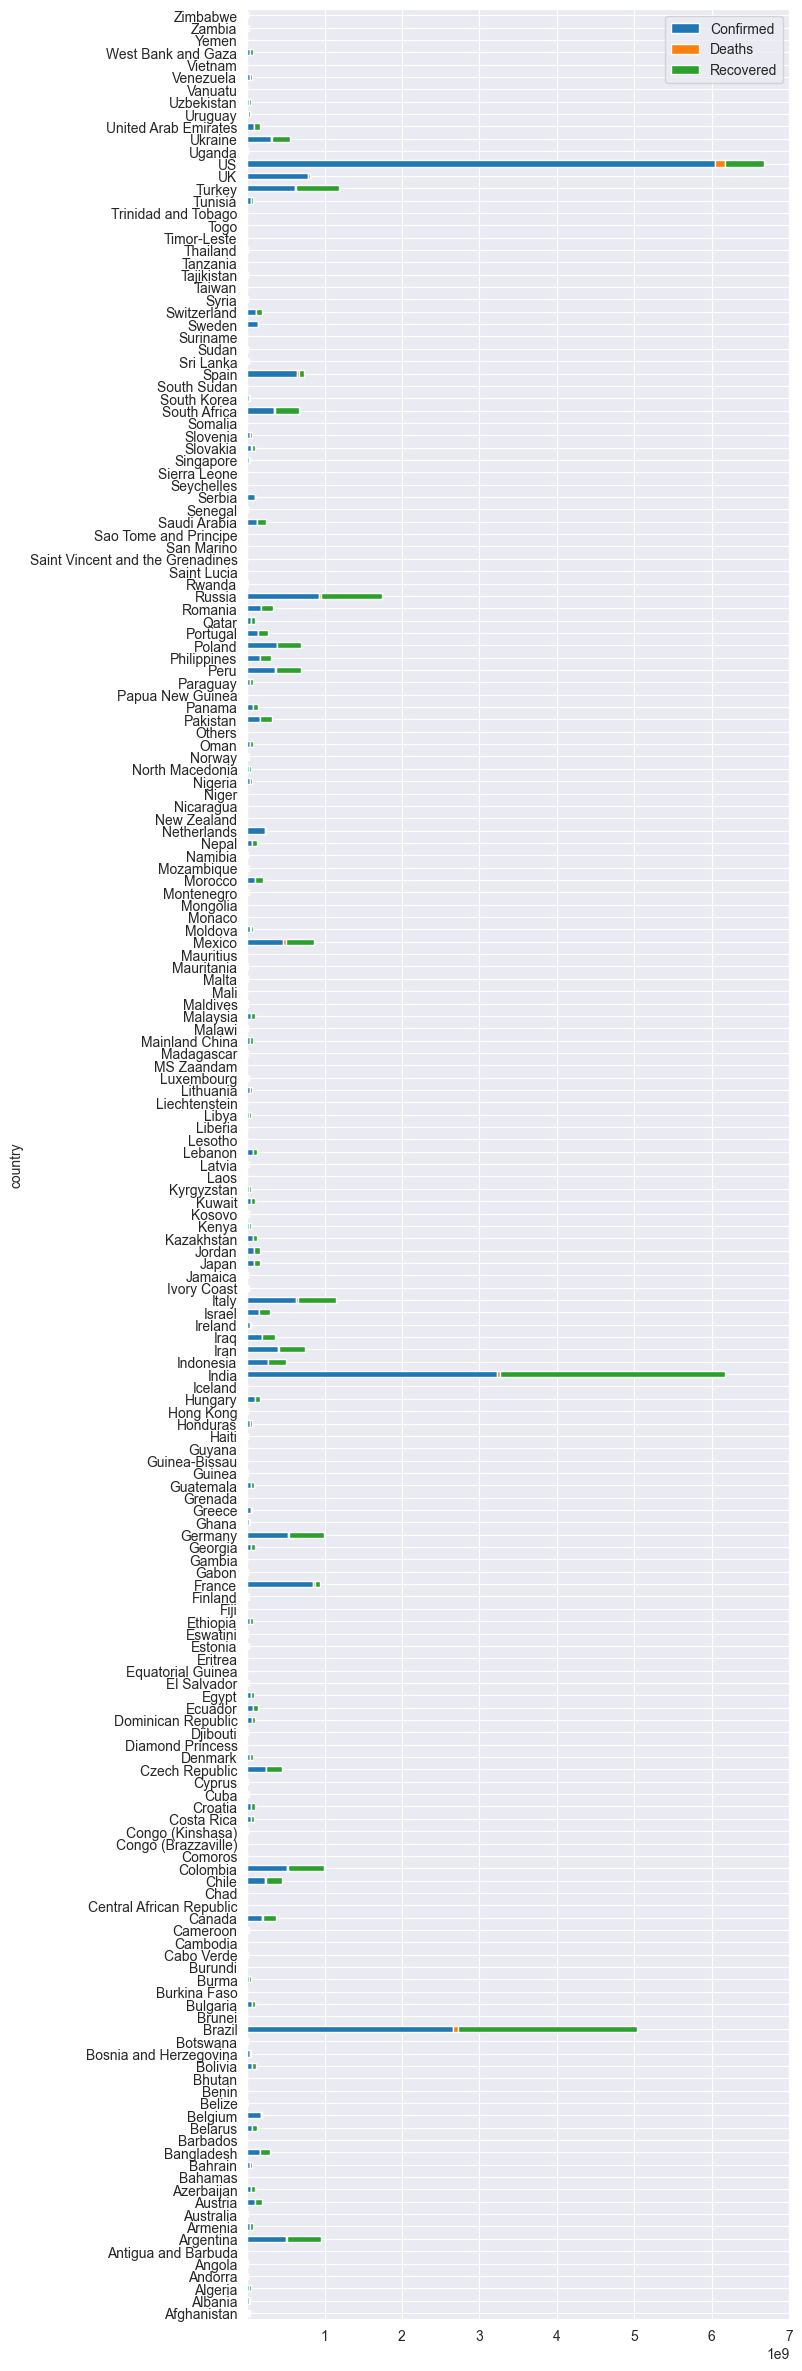

In [55]:
data_gr.plot.barh(figsize=(7, 30),stacked=True)

In [56]:
data_gr['th'] = data_gr['Confirmed'] + data_gr['Deaths'] + data_gr['Recovered']
index3 = data_gr[ data_gr['th'] < 100000000 ].index
data_gr.drop(index3, inplace = True)
data_gr.drop('th', axis=1, inplace=True)
data_gr

,Confirmed,Deaths,Recovered
country,,,
Argentina,504802880,12112441,438750295
Austria,97965875,1678309,89050545
Bangladesh,161494811,2369239,132982094
Belarus,65435028,488800,60474253
Belgium,179009886,6292525,3797948
Bolivia,61346449,2989039,45815929
Brazil,2653587540,72624610,2313677028
Bulgaria,56530042,2186376,42095369
Canada,193497537,5692896,171576903


<Axes: xlabel='country'>

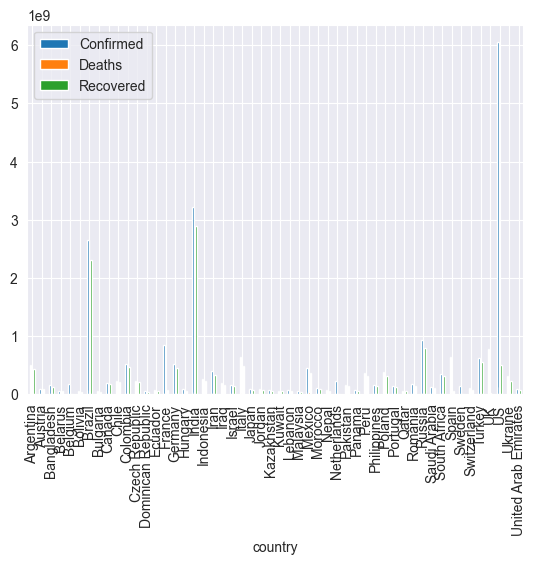

In [57]:
data_gr.plot.bar()

<Axes: xlabel='country'>

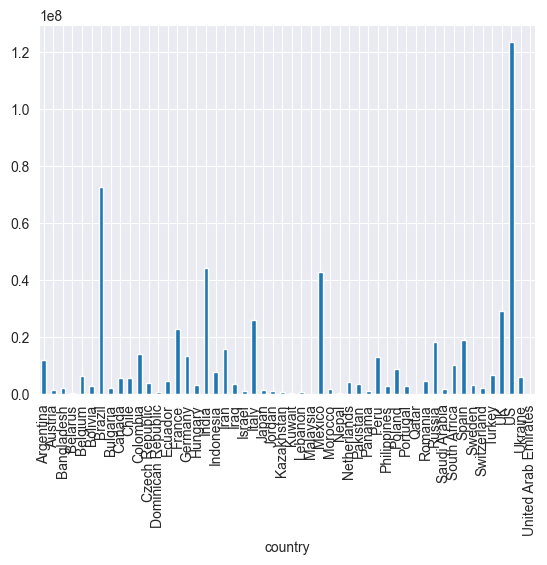

In [58]:
data_gr['Deaths'].plot.bar()

<Axes: xlabel='country'>

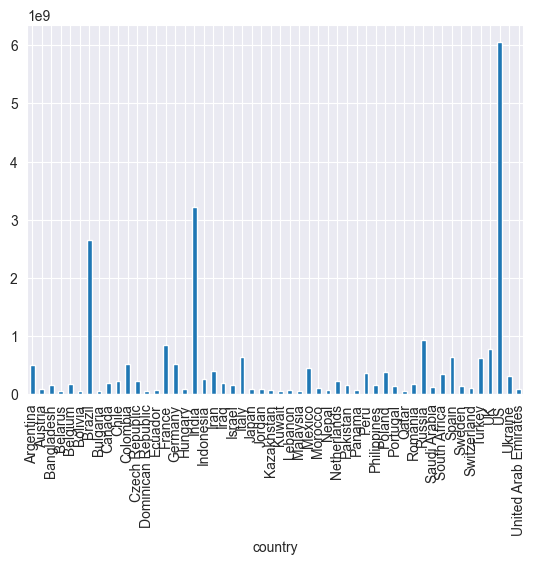

In [59]:
data_gr['Confirmed'].plot.bar()

In [60]:
data_gr['deaths_con']=data_gr['Deaths']